In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import warnings
warnings.simplefilter("ignore")

Populating the interactive namespace from numpy and matplotlib


# Checking if there are any null values to any of the features from data set

<AxesSubplot:>

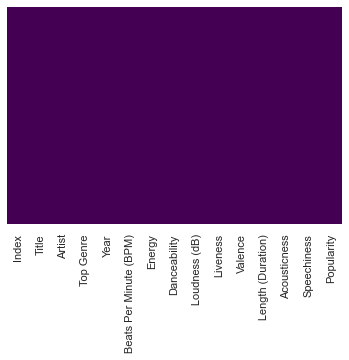

In [109]:
sns.heatmap(spotify_data.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [116]:
# Converting "Length (Duration)" feature to int type 

spotify_data = pd.read_csv("Spotify-2000.csv")
spotify_data.columns.values
spotify_data[:5]
spotify_data.dtypes
spotify_data["Length (Duration)"] = spotify_data["Length (Duration)"].astype("string")
def dur_strp(duration):
    for dur in duration:
        return duration.replace(",","")
spotify_data["Length (Duration)"] = spotify_data["Length (Duration)"].map(dur_strp)
spotify_data["Length (Duration)"] = spotify_data["Length (Duration)"].astype("int64")
spotify_data.sort_values(by = "Length (Duration)")
spotify_data.dtypes

Index                      int64
Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)          int64
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object

# Liveness, Speechiness, Loudness over the years

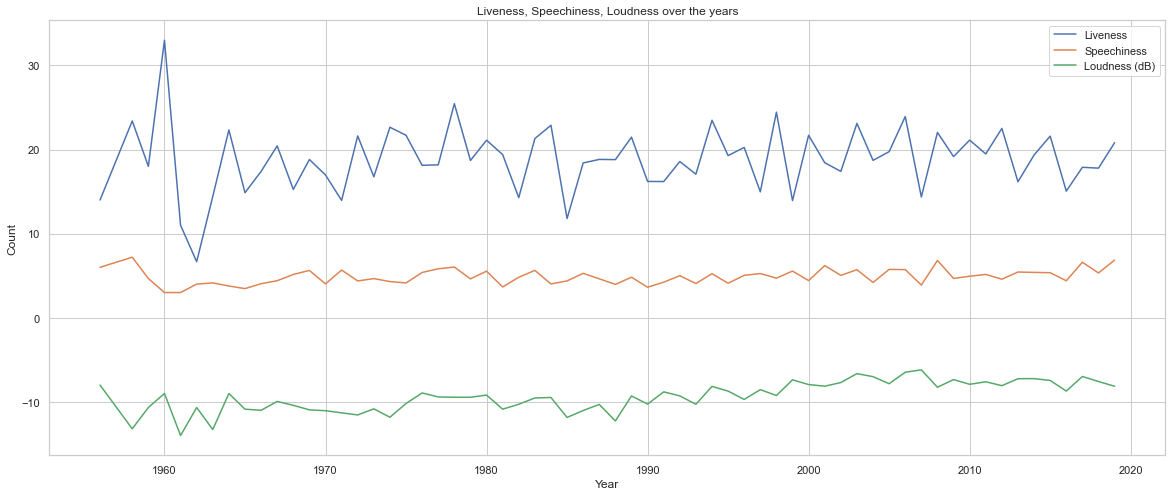

In [85]:
plt.figure(figsize=(20,8))
sns.set(style="whitegrid")
columns = ["Liveness", "Speechiness","Loudness (dB)"]
for col in columns:
    x = spotify_data.groupby("Year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col);
ax.set_title('Liveness, Speechiness, Loudness over the years');
ax.set_ylabel('Count');
ax.set_xlabel('Year');

# "Danceability", "Valence", "Acousticness" over the years

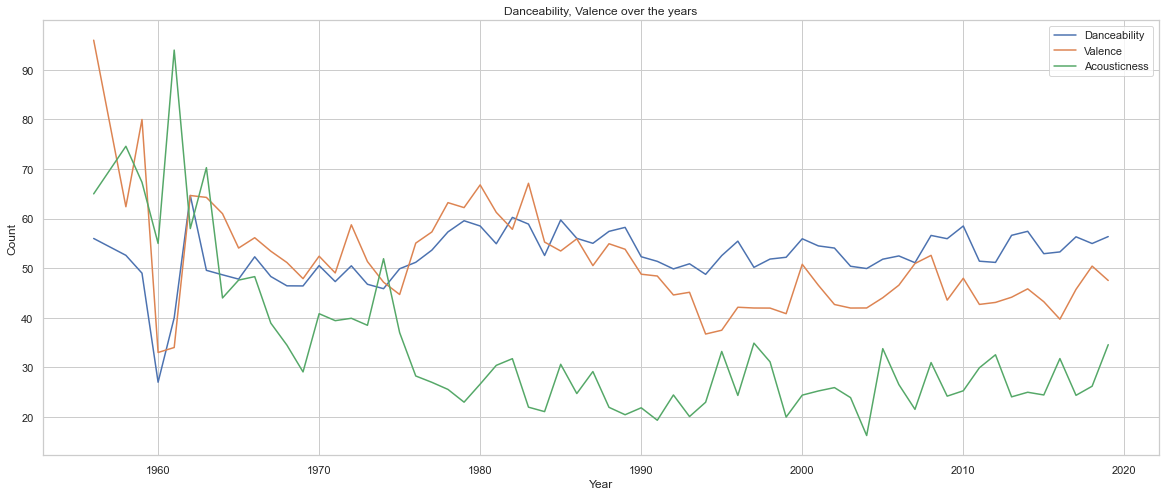

In [98]:
plt.figure(figsize=(20, 8))
sns.set(style="whitegrid")
columns = ["Danceability","Valence","Acousticness"]
for col in columns:
    x = spotify_data.groupby("Year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col);
ax.set_title('Danceability, Valence over the years');
ax.set_ylabel('Count');
ax.set_xlabel('Year');

# "Energy", "Danceability", "Valence", "Acousticness over the years

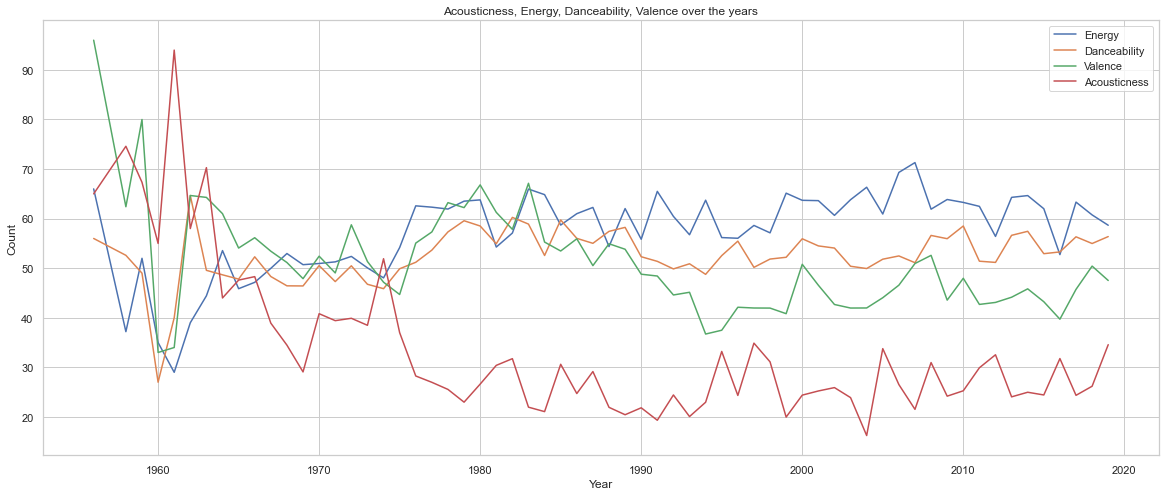

In [84]:
plt.figure(figsize=(20,8))
sns.set(style="whitegrid")
columns = ["Energy", "Danceability","Valence", "Acousticness",]
for col in columns:
    x = spotify_data.groupby("Year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col);
ax.set_title('Energy, Danceability, Valence, Acouticness over the years');
ax.set_ylabel('Count');
ax.set_xlabel('Year');

# Genre Vs Popularity over the years

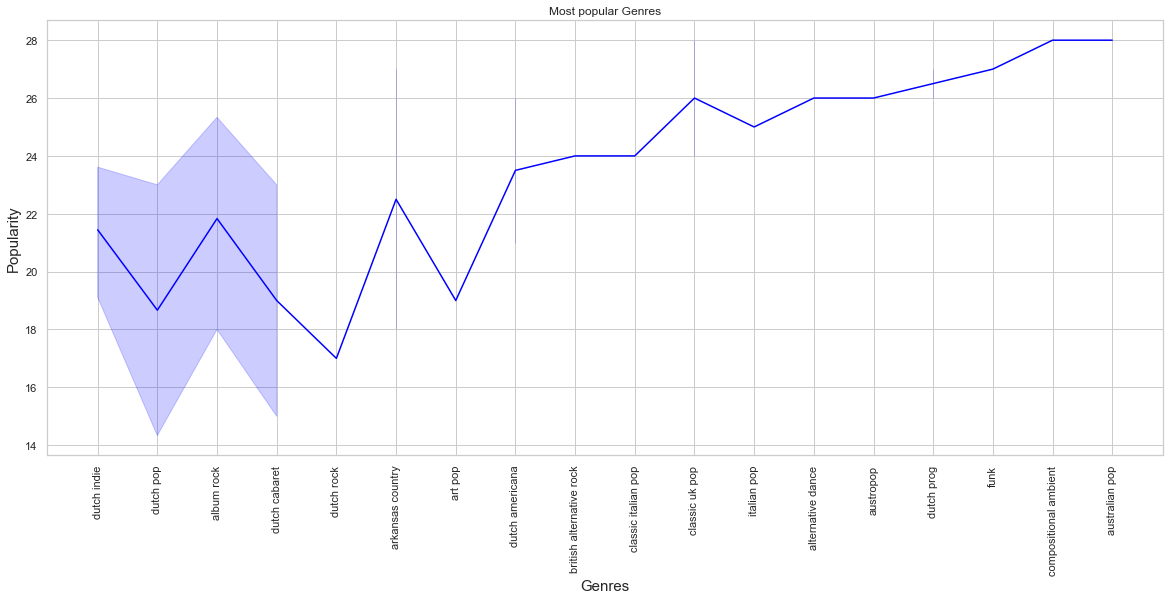

In [117]:
spotify_data_top =spotify_data.sort_values(by = "Popularity").iloc[:50]
plt.figure(figsize=(20,8))
sns.lineplot(spotify_data_top['Top Genre'], spotify_data_top['Popularity'], color='blue')
plt.title('Most popular Genres')
plt.xlabel('Genres', fontsize = 15)
plt.ylabel('Popularity', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

# Top Artists based on Popularity by Count 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'The Beatles'),
  Text(1, 0, 'Queen'),
  Text(2, 0, 'Coldplay'),
  Text(3, 0, 'Michael Jackson'),
  Text(4, 0, 'The Rolling Stones'),
  Text(5, 0, 'U2'),
  Text(6, 0, 'Bruce Springsteen'),
  Text(7, 0, 'David Bowie'),
  Text(8, 0, 'ABBA'),
  Text(9, 0, 'Fleetwood Mac'),
  Text(10, 0, 'Elvis Presley'),
  Text(11, 0, 'Adele'),
  Text(12, 0, 'Muse'),
  Text(13, 0, 'Ed Sheeran'),
  Text(14, 0, 'George Michael'),
  Text(15, 0, 'Creedence Clearwater Revival'),
  Text(16, 0, 'Red Hot Chili Peppers'),
  Text(17, 0, 'Pink Floyd'),
  Text(18, 0, 'Eagles'),
  Text(19, 0, 'Elton John')])

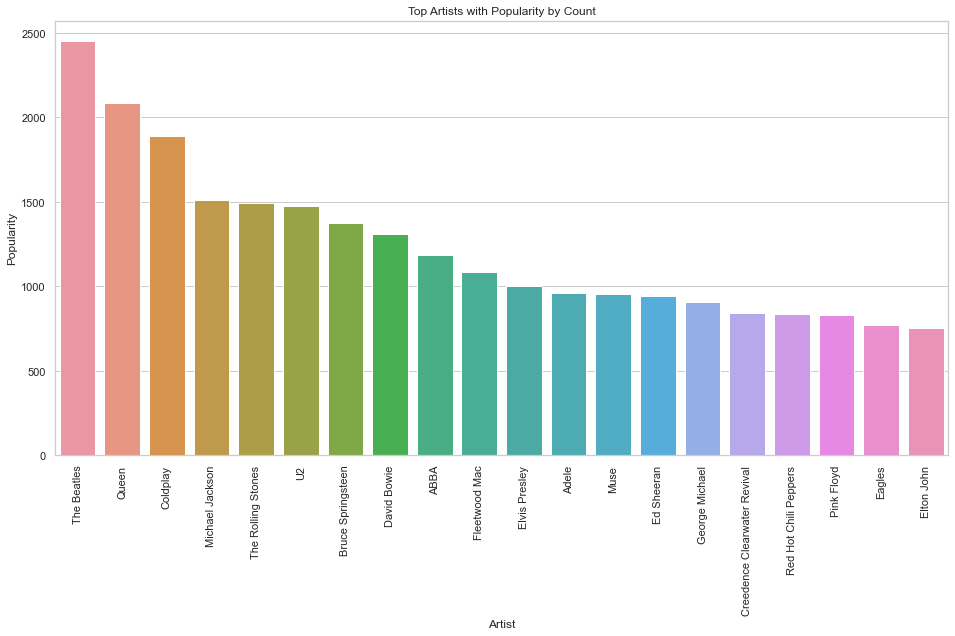

In [107]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = spotify_data.groupby("Artist")["Popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity by Count')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artist')
plt.xticks(rotation = 90)

# Top Artists based on Popularity by Mean

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Tones and I'),
  Text(1, 0, 'Billie Eilish'),
  Text(2, 0, 'Mariah Carey'),
  Text(3, 0, 'Panic! At The Disco'),
  Text(4, 0, 'Maroon 5'),
  Text(5, 0, 'Calvin Harris'),
  Text(6, 0, 'Lewis Capaldi'),
  Text(7, 0, 'Camila Cabello'),
  Text(8, 0, 'Foster The People'),
  Text(9, 0, 'Band Aid'),
  Text(10, 0, 'The Chainsmokers'),
  Text(11, 0, 'Sam Smith'),
  Text(12, 0, '5 Seconds of Summer'),
  Text(13, 0, 'Justin Bieber'),
  Text(14, 0, 'The Pogues'),
  Text(15, 0, 'Macklemore & Ryan Lewis'),
  Text(16, 0, 'Twenty One Pilots'),
  Text(17, 0, 'WALK THE MOON'),
  Text(18, 0, 'Shawn Mendes'),
  Text(19, 0, 'Tame Impala')])

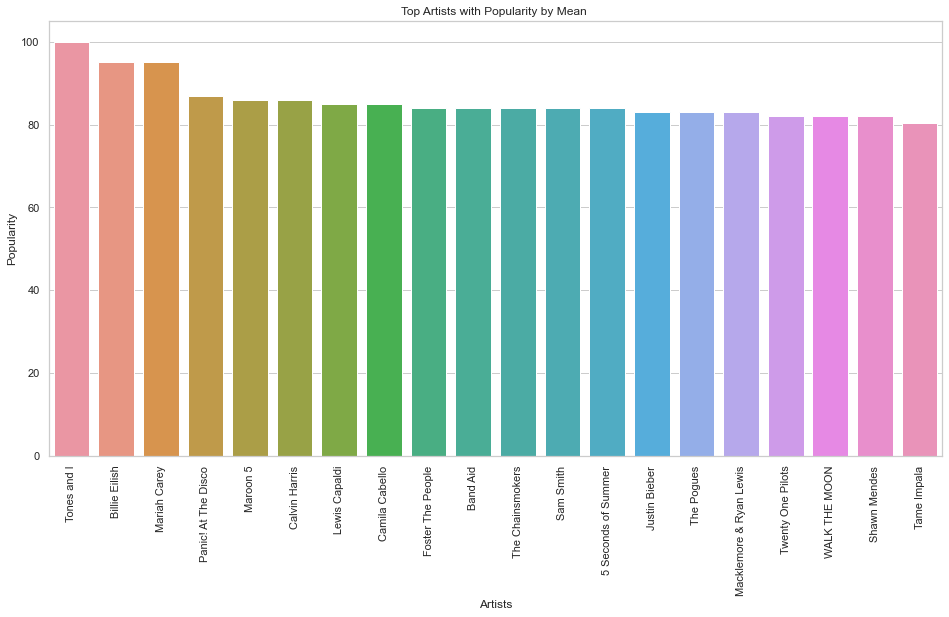

In [106]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = spotify_data.groupby("Artist")["Popularity"].mean().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity by Mean ')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)